In [60]:
## Imports
import numpy as np
import os
import tensorflow as tf

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from os import listdir
from PIL import Image
from matplotlib.image import imread

import seaborn as sns
import random

from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from tensorflow.keras.layers import Dense,Conv2D,BatchNormalization,MaxPool2D,Flatten,Dropout
from tensorflow.keras import callbacks
from warnings import filterwarnings
filterwarnings('ignore')

In [61]:
### Data Directory 

data_dir = "../Data/"

### Listsing Data
listdir(data_dir+"/Train/Train_Images")

['00000000.png',
 '00000001.png',
 '00000002.jpg',
 '00000002.png',
 '00000003.png',
 '00000004.png',
 '00000006.jpg',
 '00000006.png',
 '00000007.jpg',
 '00000008.jpeg',
 '00000011.png',
 '00000013.jpeg',
 '00000014.jpg',
 '00000014.png',
 '00000017.png',
 '00000018.jpg',
 '00000019.jpg',
 '00000022.png',
 '00000023.png',
 '00000024.jpg',
 '00000024.png',
 '00000025.png',
 '00000026.png',
 '00000027.jpg',
 '00000028.jpg',
 '00000029.jpg',
 '00000030.jpg',
 '00000032.jpg',
 '00000035.jpg',
 '00000035.png',
 '00000037.jpeg',
 '00000037.jpg',
 '00000038.png',
 '00000039.jpg',
 '00000041.png',
 '00000042.jpeg',
 '00000042.jpg',
 '00000043.jpg',
 '00000044.jpg',
 '00000044.png',
 '00000046.jpg',
 '00000046.png',
 '00000048.jpg',
 '00000050.png',
 '00000052.png',
 '00000054.jpg',
 '00000055.png',
 '00000058.png',
 '00011de7222942a3a8eb1b58e94e927c.jpg',
 '00cb794a5c3f42b6a04905116f60d44d.jpg',
 '00cc01c6418b4a268691127baf8cc8ce.jpg',
 '00fd8c607c3d45e0a87d8d01e7231e5c.jpg',
 '011b5a95b95e4d

In [62]:
### Reading Labels 
Labels = pd.read_csv(data_dir+'/Label_Name.csv')

In [63]:
Labels = Labels.to_dict()['Pokemon_Name']

In [64]:
## Test path 
test_path = data_dir+'Test\\Test_Images\\'
## Train Path
train_path = data_dir+'Train\\Train_Images\\'

path:  ../Data/Train\Train_Images\0694f6a02700448b907f808eb3f3df6e.jpg
Dimensions: (300, 300, 3)


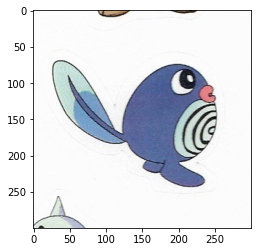

In [65]:
## read Image 

pokemon = train_path+os.listdir(train_path)[88]

print("path: ",pokemon)

print("Dimensions:",(plt.imread(pokemon)).shape)

plt.imshow(imread(pokemon))

In [66]:
## Size of Data

print("Train Data :" , len(listdir(train_path)))

print("Test Data :" , len(listdir(test_path)))

Train Data : 1797
Test Data : 436


In [67]:
### Reading the dimesions of Train size 

dim1 = []

dim2 = []

bad_image = []


for image in listdir(train_path):
    try:
        img = Image.open(train_path+image)
        img.verify()     # to verfy if its an img
        img.close()     #to close img and free memory space
    
        img = plt.imread(train_path+image)   ### Reading the image 
        d1,d2,colors = img.shape             ### Storing the dimensions
        dim1.append(d1)                      ## Storing dimension 1
        dim2.append(d2)                       ## Storing dimension 2
    except (IOError, SyntaxError) as e:
        print('Bad file:', image)
        bad_image.append(image)

Bad file: 00000044.png
Bad file: 00000055.png
Bad file: 200010472.png
Bad file: 200010481.png


In [68]:
### Lenghth of images for training  + image discareded == Total images in train
len(dim1) + len(bad_image) == len(listdir(train_path))

True

In [69]:
### Labels 
Labels

## Train Labels

train_labels = pd.read_csv(data_dir+"Train\\Train_Data_Labels.csv")

In [70]:
Labels

{0: 'Articuno',
 1: 'Blastoise',
 2: 'Charmander',
 3: 'Charmeleon',
 4: 'Cloyster',
 5: 'Gastly',
 6: 'Gengar',
 7: 'Gloom',
 8: 'Golbat',
 9: 'Golem',
 10: 'Haunter',
 11: 'Horsea',
 12: 'Jigglypuff',
 13: 'Jolteon',
 14: 'Jynx',
 15: 'Kabuto',
 16: 'Kangaskhan',
 17: 'Koffing',
 18: 'Lapras',
 19: 'Machamp',
 20: 'Mankey',
 21: 'Metapod',
 22: 'Mew',
 23: 'Mewtwo',
 24: 'Nidoking',
 25: 'Nidoqueen',
 26: 'Nidorino',
 27: 'Oddish',
 28: 'Omanyte',
 29: 'Omastar',
 30: 'Pidgey',
 31: 'Pikachu',
 32: 'Pinsir',
 33: 'Poliwag',
 34: 'Primeape',
 35: 'Psyduck',
 36: 'Raichu',
 37: 'Rapidash',
 38: 'Starmie',
 39: 'Vaporeon',
 40: 'Venomoth',
 41: 'Venusaur',
 42: 'Victreebel',
 43: 'Vileplume',
 44: 'Voltorb',
 45: 'Vulpix',
 46: 'Weedle',
 47: 'Weezing',
 48: 'Wigglytuff',
 49: 'Zapdos'}

In [71]:
train_labels

,FileName,Label
0,00000011.png,31.0
1,962696ee8df246c1b4157ba5e8b1529c.jpg,26.0
2,98eab0a1af5043d4b33f4cecf73e48dc.jpg,37.0
3,6c22904780ce4b93b700ea17d7e46746.jpg,16.0
4,51fc29cf72494fc78db5e31539b60729.jpg,14.0
...,...,...
1792,8fbc52e65bdb4c768d037af33d947d53.jpg,11.0
1793,1058c2e931134387a008512071057a77.jpg,38.0
1794,905527f5dd374fbe8086a51c85d31587.jpg,16.0
1795,7c870a2696754f1f810bc11ad103756c.jpg,44.0


In [72]:
## forming y_train label
y=[]
for img in listdir(train_path):
    if img in bad_image:
        pass
    else:
        y.append(train_labels[train_labels['FileName']==img]['Label'].values[0])

In [73]:
y

[2.0,
 31.0,
 23.0,
 31.0,
 2.0,
 2.0,
 23.0,
 2.0,
 23.0,
 23.0,
 31.0,
 23.0,
 2.0,
 31.0,
 23.0,
 31.0,
 31.0,
 2.0,
 31.0,
 23.0,
 31.0,
 2.0,
 23.0,
 31.0,
 23.0,
 31.0,
 31.0,
 23.0,
 2.0,
 31.0,
 23.0,
 2.0,
 31.0,
 2.0,
 23.0,
 23.0,
 2.0,
 2.0,
 31.0,
 31.0,
 23.0,
 31.0,
 31.0,
 31.0,
 31.0,
 31.0,
 40.0,
 27.0,
 21.0,
 27.0,
 11.0,
 14.0,
 22.0,
 31.0,
 35.0,
 13.0,
 13.0,
 10.0,
 21.0,
 21.0,
 36.0,
 11.0,
 49.0,
 21.0,
 37.0,
 26.0,
 18.0,
 27.0,
 26.0,
 48.0,
 20.0,
 15.0,
 8.0,
 27.0,
 20.0,
 0.0,
 14.0,
 44.0,
 8.0,
 13.0,
 14.0,
 31.0,
 20.0,
 38.0,
 9.0,
 38.0,
 33.0,
 17.0,
 19.0,
 23.0,
 14.0,
 16.0,
 22.0,
 23.0,
 45.0,
 20.0,
 43.0,
 35.0,
 41.0,
 11.0,
 22.0,
 32.0,
 10.0,
 4.0,
 15.0,
 36.0,
 32.0,
 34.0,
 13.0,
 23.0,
 36.0,
 2.0,
 27.0,
 21.0,
 8.0,
 40.0,
 41.0,
 44.0,
 22.0,
 45.0,
 4.0,
 0.0,
 25.0,
 24.0,
 4.0,
 14.0,
 14.0,
 31.0,
 26.0,
 32.0,
 44.0,
 30.0,
 16.0,
 28.0,
 29.0,
 2.0,
 34.0,
 15.0,
 16.0,
 24.0,
 3.0,
 36.0,
 31.0,
 2.0,
 45.0,
 8.0,
 38.

In [74]:
##

y[0]

2.0

In [75]:
np.shape(y)

(1793,)

In [76]:
y = np.array(y)

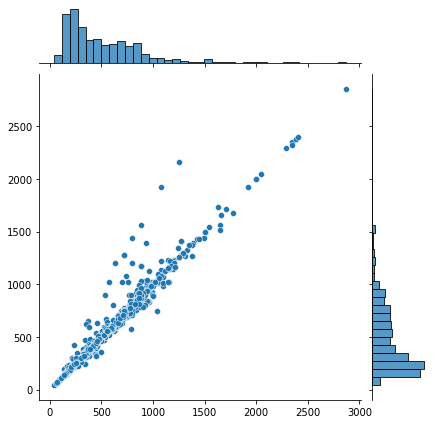

In [77]:
### Visualizing Dimensions of the train images

sns.jointplot(x=dim1,y=dim2)

In [78]:
## Verify y Label

len(y) == len(dim1)

True

In [79]:
np.mean(dim1)

490.23201338538763

In [80]:
np.mean(dim2)

495.7473508087005

In [81]:
np.mean(([np.mean(dim1),np.mean(dim2)]))

492.98968209704407

In [82]:
### resizing images to add uniformity in shape
image_shape = (64,64,3)

In [83]:
### Loading Image Data Set

## necessary imports 
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split


In [84]:
### loading data

X=[]
for i in listdir(train_path):
    if i in bad_image:
        pass
    else:
        img = image.load_img(train_path+i,target_size=image_shape)
        img = image.img_to_array(img)
        img = img/255
        X.append(img)
        
X = np.array(X)

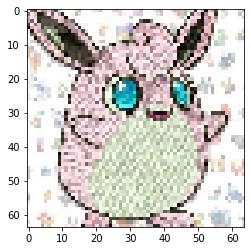

In [85]:
n = np.random.randint(low=0,high=len(y))
plt.imshow(X[n])

In [86]:
y = pd.get_dummies(y)
y = np.array(y)

In [87]:
### Shapes of X and Y 


print("X :",X.shape)

print("\nY :", y.shape)

X : (1793, 64, 64, 3)

Y : (1793, 50)


In [88]:
## Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [89]:
### Bulding A CNN 

In [90]:
## Defining Model
model = tf.keras.Sequential()

model.add(Conv2D(16,(3,3),activation='relu',input_shape= X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.1))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.1))


model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.1))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(50,activation='sigmoid'))

In [91]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
batch_normalization_5 (Batch (None, 62, 62, 16)        64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
batch_normalization_6 (Batch (None, 29, 29, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)       

In [92]:
model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [93]:
## Tensorboard call backs
tensorboard_callbacks = callbacks.TensorBoard(log_dir="tb_callback_dir",histogram_freq=1)

In [95]:
history = model.fit(X_train,y_train,epochs=175,validation_data=(X_test,y_test),callbacks=[tensorboard_callbacks],verbose=2)

Epoch 1/175
45/45 - 2s - loss: 4.0008 - accuracy: 0.0544 - val_loss: 4.0599 - val_accuracy: 0.0167
Epoch 2/175
45/45 - 1s - loss: 3.6898 - accuracy: 0.0907 - val_loss: 4.1193 - val_accuracy: 0.0585
Epoch 3/175
45/45 - 1s - loss: 3.4524 - accuracy: 0.1388 - val_loss: 4.1006 - val_accuracy: 0.0613
Epoch 4/175
45/45 - 1s - loss: 3.2505 - accuracy: 0.1722 - val_loss: 4.0258 - val_accuracy: 0.0529
Epoch 5/175
45/45 - 1s - loss: 3.0452 - accuracy: 0.2029 - val_loss: 3.9272 - val_accuracy: 0.0724
Epoch 6/175
45/45 - 1s - loss: 2.8729 - accuracy: 0.2441 - val_loss: 3.7569 - val_accuracy: 0.0780
Epoch 7/175
45/45 - 1s - loss: 2.6963 - accuracy: 0.2880 - val_loss: 3.5144 - val_accuracy: 0.0947
Epoch 8/175
45/45 - 1s - loss: 2.5726 - accuracy: 0.3068 - val_loss: 3.2565 - val_accuracy: 0.1337
Epoch 9/175
45/45 - 1s - loss: 2.4164 - accuracy: 0.3598 - val_loss: 2.9594 - val_accuracy: 0.2006
Epoch 10/175
45/45 - 1s - loss: 2.2679 - accuracy: 0.3926 - val_loss: 2.7177 - val_accuracy: 0.2563
Epoch 11/

45/45 - 0s - loss: 0.1718 - accuracy: 0.9763 - val_loss: 1.1060 - val_accuracy: 0.6936
Epoch 84/175
45/45 - 1s - loss: 0.1714 - accuracy: 0.9742 - val_loss: 1.1028 - val_accuracy: 0.6880
Epoch 85/175
45/45 - 0s - loss: 0.1682 - accuracy: 0.9805 - val_loss: 1.1168 - val_accuracy: 0.6769
Epoch 86/175
45/45 - 1s - loss: 0.1588 - accuracy: 0.9868 - val_loss: 1.1158 - val_accuracy: 0.6908
Epoch 87/175
45/45 - 1s - loss: 0.1551 - accuracy: 0.9756 - val_loss: 1.1227 - val_accuracy: 0.6852
Epoch 88/175
45/45 - 1s - loss: 0.1499 - accuracy: 0.9833 - val_loss: 1.1113 - val_accuracy: 0.6992
Epoch 89/175
45/45 - 1s - loss: 0.1409 - accuracy: 0.9868 - val_loss: 1.1193 - val_accuracy: 0.6908
Epoch 90/175
45/45 - 1s - loss: 0.1428 - accuracy: 0.9840 - val_loss: 1.1310 - val_accuracy: 0.6880
Epoch 91/175
45/45 - 1s - loss: 0.1356 - accuracy: 0.9826 - val_loss: 1.1486 - val_accuracy: 0.6825
Epoch 92/175
45/45 - 1s - loss: 0.1206 - accuracy: 0.9854 - val_loss: 1.1177 - val_accuracy: 0.6936
Epoch 93/175


Epoch 165/175
45/45 - 1s - loss: 0.0166 - accuracy: 0.9993 - val_loss: 1.0603 - val_accuracy: 0.7187
Epoch 166/175
45/45 - 1s - loss: 0.0174 - accuracy: 0.9979 - val_loss: 1.0975 - val_accuracy: 0.7242
Epoch 167/175
45/45 - 1s - loss: 0.0197 - accuracy: 0.9965 - val_loss: 1.0740 - val_accuracy: 0.7131
Epoch 168/175
45/45 - 1s - loss: 0.0174 - accuracy: 0.9979 - val_loss: 1.1200 - val_accuracy: 0.7103
Epoch 169/175
45/45 - 1s - loss: 0.0148 - accuracy: 1.0000 - val_loss: 1.1268 - val_accuracy: 0.7103
Epoch 170/175
45/45 - 1s - loss: 0.0186 - accuracy: 0.9972 - val_loss: 1.1168 - val_accuracy: 0.6992
Epoch 171/175
45/45 - 1s - loss: 0.0196 - accuracy: 0.9965 - val_loss: 1.0851 - val_accuracy: 0.7214
Epoch 172/175
45/45 - 1s - loss: 0.0134 - accuracy: 1.0000 - val_loss: 1.0800 - val_accuracy: 0.7242
Epoch 173/175
45/45 - 1s - loss: 0.0143 - accuracy: 0.9993 - val_loss: 1.0814 - val_accuracy: 0.7326
Epoch 174/175
45/45 - 1s - loss: 0.0167 - accuracy: 0.9993 - val_loss: 1.0911 - val_accurac

12/12 - 0s - loss: 1.0711 - accuracy: 0.7242


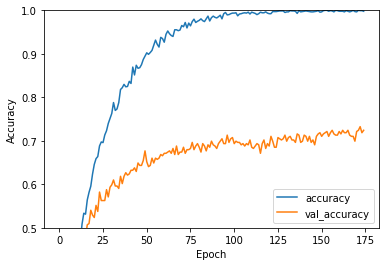

In [96]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [97]:
print(test_acc)

0.7242339849472046


In [98]:
history = pd.DataFrame(history.history)

<AxesSubplot:>

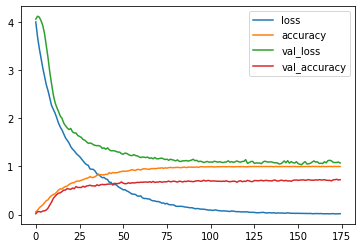

In [99]:
history.plot()

In [100]:
pred = model.predict(X_test)

In [101]:
pred

array([[0.7103318 , 0.0460964 , 0.03603607, ..., 0.53395784, 0.00447553,
        0.13601461],
       [0.2781725 , 0.05215441, 0.8480428 , ..., 0.8699032 , 0.05971659,
        0.93499136],
       [0.14722827, 0.3333671 , 0.41559866, ..., 0.8100253 , 0.00826016,
        0.99999726],
       ...,
       [0.52643204, 0.4098649 , 0.67744976, ..., 0.7998301 , 0.79199773,
        0.8100103 ],
       [0.9608914 , 0.95797265, 0.44831777, ..., 0.99400085, 0.9036531 ,
        0.514597  ],
       [0.9976376 , 0.11551534, 0.06041728, ..., 0.39582977, 0.5994706 ,
        0.13649854]], dtype=float32)

In [102]:
y_pred = []

for p in pred:
  y_pred.append(np.argmax(p))

In [103]:
y_test = [np.argmax(y) for y in y_test]

In [104]:
print("Accuracy Score : ",(accuracy_score(y_test,y_pred)*100).round(2))

Accuracy Score :  72.42


In [105]:
print('\n*Classification Report:\n', classification_report(y_test, y_pred))
confusion_matrix_graph = confusion_matrix(y_test, y_pred);


*Classification Report:
               precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       0.00      0.00      0.00         2
           2       0.86      1.00      0.92         6
           3       0.80      0.80      0.80        10
           4       0.78      0.88      0.82         8
           5       0.00      0.00      0.00         2
           6       1.00      0.50      0.67        10
           7       1.00      1.00      1.00         9
           8       0.80      0.67      0.73         6
           9       0.58      0.78      0.67         9
          10       0.57      0.73      0.64        11
          11       0.89      0.62      0.73        13
          12       0.00      0.00      0.00         2
          13       0.67      0.67      0.67         9
          14       0.86      0.86      0.86         7
          15       1.00      0.71      0.83        14
          16       0.62      0.80      0.70        10
 

In [ ]:
confusion_matrix_graph = confusion_matrix(y_test,y_pred)

In [ ]:
print(confusion_matrix_graph)

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(confusion_matrix_graph,cmap='Blues');

In [ ]:
import tensorboard
tensorboard.__version__

In [ ]:
%load_ext tensorboard